**LSTM**

In [1]:

#import libraries
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


In [2]:
#importing the training set - 2012 to 2016
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [3]:
#Extract first column from the csv file -- opening stock price as a matrix not vector
training_set = training_set.iloc[:,1:2].values
training_set

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       ..., 
       [ 793.7 ],
       [ 783.33],
       [ 782.75]])

In [4]:
#Apply feature scaling - normalize from zero to one
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler() #default normalization is 0-1


In [5]:
#Fit to training set -- apply min and max of training set
training_set = sc.fit_transform(training_set)

<IPython.core.display.Javascript object>


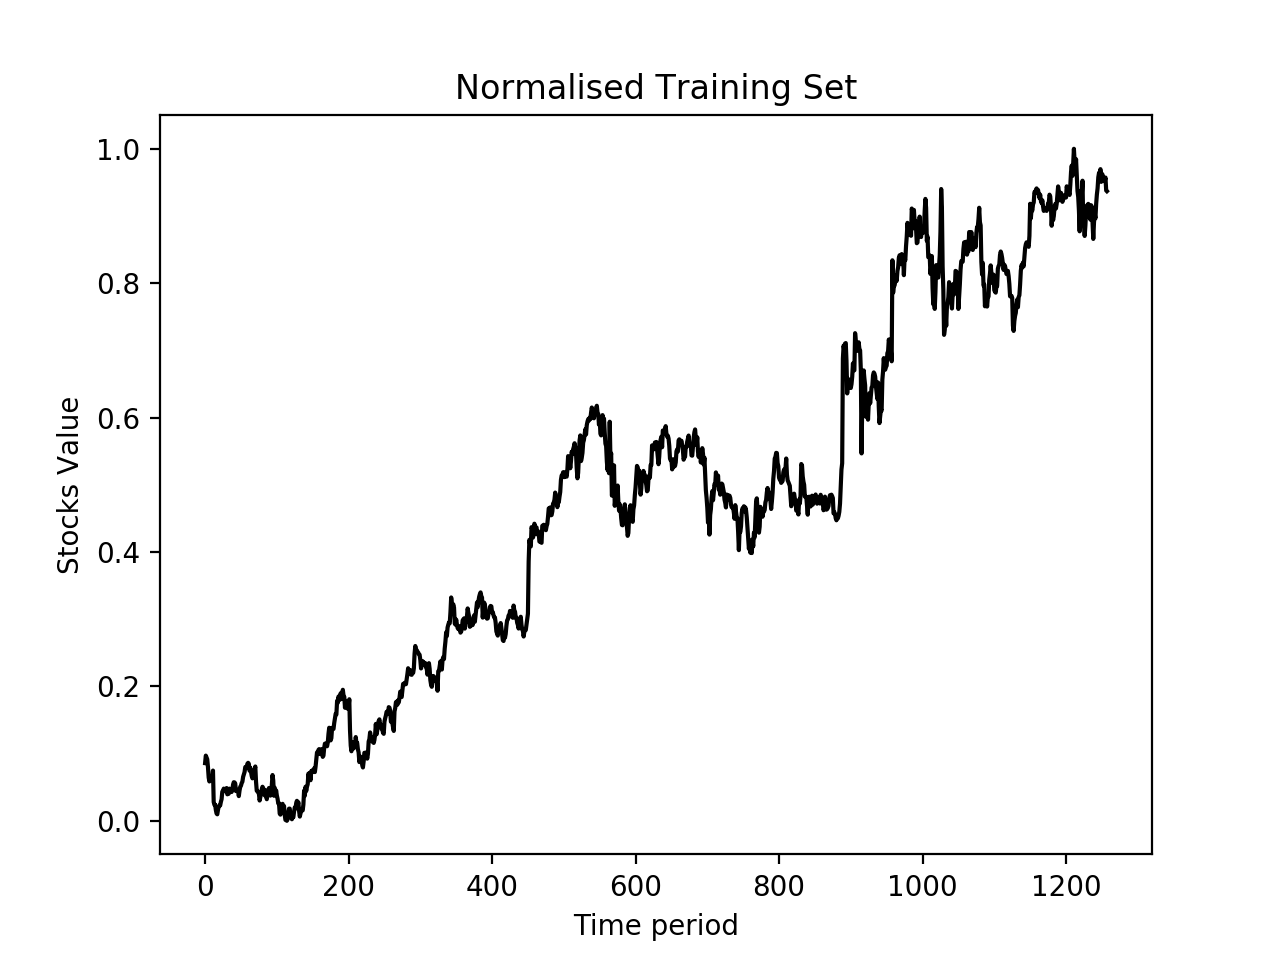

In [6]:
#Visualize data
plt.figure()
plt.plot(training_set, color = 'black', label = 'Normalised training set')
plt.xlabel('Time period')
plt.ylabel('Stocks Value')
plt.show
plt.title('Normalised Training Set')

**Cutting Time Series into Subsequences**

In [7]:
#Cutting Time Series into Sub Sequences

def window_transform_series(series,window_size):
    # containers for input/output pairs
    X = []
    y = []

    for i in range(window_size,len(series)):
        X.append(series[i-window_size: i])
        y.append(series[i])
        
    # reshape each to return I/O as NP arrays
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)
    
    return X,y 

In [8]:
#window the data using your windowing function
window_size = 4 #A week
X,y = window_transform_series(series = training_set,window_size = window_size)

In [9]:

X_train = X[0:] 

print(X[0:3])
print(y[1:3])
X_train.shape

[[ 0.08581368  0.09701243  0.09433366  0.09156187]
 [ 0.09701243  0.09433366  0.09156187  0.07984225]
 [ 0.09433366  0.09156187  0.07984225  0.0643277 ]]
[[ 0.0643277]
 [ 0.0585423]]


(1254, 4)

In [10]:
y_train = y[0:] #till the last day training period
y_train.shape

(1254, 1)

In [11]:
#Reshape inputs to a 3D Array 
#samples, time steps, features

X_train = np.reshape(X_train, (X_train.shape[0],window_size,1))
X_train

array([[[ 0.08581368],
        [ 0.09701243],
        [ 0.09433366],
        [ 0.09156187]],

       [[ 0.09701243],
        [ 0.09433366],
        [ 0.09156187],
        [ 0.07984225]],

       [[ 0.09433366],
        [ 0.09156187],
        [ 0.07984225],
        [ 0.0643277 ]],

       ..., 
       [[ 0.96123223],
        [ 0.95475854],
        [ 0.95204256],
        [ 0.95163331]],

       [[ 0.95475854],
        [ 0.95204256],
        [ 0.95163331],
        [ 0.95725128]],

       [[ 0.95204256],
        [ 0.95163331],
        [ 0.95725128],
        [ 0.93796041]]])

In [12]:
#Import Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [13]:
#Initialize RNN - Regression model - stock price is continous
regressor = Sequential() #a sequence of layers



In [14]:
#Add LSTM layer which takes as input the input layer 

regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape= (window_size,1)))

In [15]:
#Output layer - Dense Class
#Units - no of neurons in output layer. stock price

regressor.add(Dense(units = 1))

In [16]:
#Compile the RNN
regressor.compile(optimizer = 'RMSprop', loss ='mean_squared_error')

In [17]:
#Fit RNN to training set 
regressor.fit(X_train, y_train, batch_size = 32, epochs = 250)

Epoch 1/250
1254/1254 [==============================] - 0s - loss: 0.1282     
Epoch 2/250
1254/1254 [==============================] - 0s - loss: 0.0782     
Epoch 3/250
1254/1254 [==============================] - 0s - loss: 0.0617     
Epoch 4/250
1254/1254 [==============================] - 0s - loss: 0.0573     
Epoch 5/250
1254/1254 [==============================] - 0s - loss: 0.0532     
Epoch 6/250
1254/1254 [==============================] - 0s - loss: 0.0490     
Epoch 7/250
1254/1254 [==============================] - 0s - loss: 0.0448     
Epoch 8/250
1254/1254 [==============================] - 0s - loss: 0.0405     
Epoch 9/250
1254/1254 [==============================] - 0s - loss: 0.0361     
Epoch 10/250
1254/1254 [==============================] - 0s - loss: 0.0315     
Epoch 11/250
1254/1254 [==============================] - 0s - loss: 0.0268     
Epoch 12/250
1254/1254 [==============================] - 0s - loss: 0.0225     
Epoch 13/250
1254/1254 [=============

1254/1254 [==============================] - 0s - loss: 2.8172e-04     
Epoch 194/250
1254/1254 [==============================] - 0s - loss: 2.8440e-04     
Epoch 195/250
1254/1254 [==============================] - 0s - loss: 2.8757e-04     
Epoch 196/250
1254/1254 [==============================] - 0s - loss: 2.8311e-04     
Epoch 197/250
1254/1254 [==============================] - 0s - loss: 2.8605e-04     
Epoch 198/250
1254/1254 [==============================] - 0s - loss: 2.8536e-04     
Epoch 199/250
1254/1254 [==============================] - 0s - loss: 2.8688e-04     
Epoch 200/250
1254/1254 [==============================] - 0s - loss: 2.8329e-04     
Epoch 201/250
1254/1254 [==============================] - 0s - loss: 2.8206e-04     
Epoch 202/250
1254/1254 [==============================] - 0s - loss: 2.9114e-04     
Epoch 203/250
1254/1254 [==============================] - 0s - loss: 2.8536e-04     
Epoch 204/250
1254/1254 [==============================] - 0s - loss

In [18]:
#R
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 101.0
Trainable params: 101
Non-trainable params: 0.0
_________________________________________________________________


In [49]:
#Import stock price 2017 -- TEST
test_set = pd.read_csv('goog1.csv')
test_set

,Date,Open,High,Low,Close,Volume
0,03-Jan-17,778.81,789.63,775.80,786.14,1657268
1,04-Jan-17,788.36,791.34,783.16,786.90,1072958
2,05-Jan-17,786.08,794.48,785.02,794.02,1335167
3,06-Jan-17,795.26,807.90,792.20,806.15,1640170
4,09-Jan-17,806.40,809.97,802.83,806.65,1274645
5,10-Jan-17,807.86,809.13,803.51,804.79,1176780
6,11-Jan-17,805.00,808.15,801.37,807.91,1065936
7,12-Jan-17,807.14,807.39,799.17,806.36,1353057
8,13-Jan-17,807.48,811.22,806.69,807.88,1099215
9,17-Jan-17,807.08,807.14,800.37,804.61,1362115


In [50]:
stock_price = test_set.iloc[:,1:2].values
stock_price

array([[ 778.81],
       [ 788.36],
       [ 786.08],
       [ 795.26],
       [ 806.4 ],
       [ 807.86],
       [ 805.  ],
       [ 807.14],
       [ 807.48],
       [ 807.08],
       [ 805.81],
       [ 805.12],
       [ 806.91],
       [ 807.25],
       [ 822.3 ],
       [ 829.62],
       [ 837.81],
       [ 834.71],
       [ 814.66],
       [ 796.86],
       [ 799.68],
       [ 793.8 ],
       [ 802.99],
       [ 799.7 ],
       [ 803.99],
       [ 807.  ],
       [ 809.51],
       [ 811.7 ],
       [ 816.  ],
       [ 819.  ],
       [ 819.36],
       [ 819.93],
       [ 823.02],
       [ 828.66],
       [ 828.66],
       [ 830.12],
       [ 827.73],
       [ 824.55],
       [ 825.61],
       [ 828.85],
       [ 833.85],
       [ 830.56],
       [ 826.95],
       [ 827.4 ],
       [ 833.51],
       [ 836.  ],
       [ 843.28],
       [ 844.  ],
       [ 843.64],
       [ 847.59],
       [ 849.03],
       [ 851.61],
       [ 850.01],
       [ 851.4 ],
       [ 831.91],
       [ 8

In [51]:
inputs = stock_price

#Scale inputs
inputs = sc.fit_transform(inputs)
inputs



array([[ 0.        ],
       [ 0.04642909],
       [ 0.03534445],
       [ 0.07997472],
       [ 0.13413389],
       [ 0.14123195],
       [ 0.12732753],
       [ 0.13773154],
       [ 0.13938451],
       [ 0.13743984],
       [ 0.1312655 ],
       [ 0.12791093],
       [ 0.13661335],
       [ 0.13826632],
       [ 0.21143468],
       [ 0.24702222],
       [ 0.28683942],
       [ 0.27176819],
       [ 0.17429141],
       [ 0.08775342],
       [ 0.10146337],
       [ 0.07287666],
       [ 0.11755554],
       [ 0.1015606 ],
       [ 0.12241723],
       [ 0.1370509 ],
       [ 0.14925373],
       [ 0.15990082],
       [ 0.18080607],
       [ 0.19539112],
       [ 0.19714133],
       [ 0.19991249],
       [ 0.2149351 ],
       [ 0.242355  ],
       [ 0.242355  ],
       [ 0.24945306],
       [ 0.23783363],
       [ 0.22237347],
       [ 0.22752686],
       [ 0.24327872],
       [ 0.26758715],
       [ 0.2515922 ],
       [ 0.23404152],
       [ 0.23622928],
       [ 0.26593417],
       [ 0

In [52]:
#Reshape input 
inputs_sub_x,inputs_y = window_transform_series(series = inputs,window_size = window_size)
inputs_sub_x
inputs_y

array([[ 0.13413389],
       [ 0.14123195],
       [ 0.12732753],
       [ 0.13773154],
       [ 0.13938451],
       [ 0.13743984],
       [ 0.1312655 ],
       [ 0.12791093],
       [ 0.13661335],
       [ 0.13826632],
       [ 0.21143468],
       [ 0.24702222],
       [ 0.28683942],
       [ 0.27176819],
       [ 0.17429141],
       [ 0.08775342],
       [ 0.10146337],
       [ 0.07287666],
       [ 0.11755554],
       [ 0.1015606 ],
       [ 0.12241723],
       [ 0.1370509 ],
       [ 0.14925373],
       [ 0.15990082],
       [ 0.18080607],
       [ 0.19539112],
       [ 0.19714133],
       [ 0.19991249],
       [ 0.2149351 ],
       [ 0.242355  ],
       [ 0.242355  ],
       [ 0.24945306],
       [ 0.23783363],
       [ 0.22237347],
       [ 0.22752686],
       [ 0.24327872],
       [ 0.26758715],
       [ 0.2515922 ],
       [ 0.23404152],
       [ 0.23622928],
       [ 0.26593417],
       [ 0.27803977],
       [ 0.31343284],
       [ 0.31693325],
       [ 0.31518304],
       [ 0

In [53]:
#Reshape to 3D Array
inputs_reshaped = np.reshape(inputs_sub_x,(inputs_sub_x.shape[0],window_size,1))

In [54]:
#Predict -- returns scaled output 
predicted_stock_price = regressor.predict(inputs_reshaped)

In [55]:
#Scale back
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [56]:
predicted_stock_price

array([[ 792.96936035],
       [ 802.42340088],
       [ 806.03149414],
       [ 805.7131958 ],
       [ 807.33056641],
       [ 807.78320312],
       [ 807.60546875],
       [ 806.8036499 ],
       [ 806.09051514],
       [ 807.06109619],
       [ 807.49334717],
       [ 817.91320801],
       [ 825.73632812],
       [ 833.93676758],
       [ 834.70367432],
       [ 821.48217773],
       [ 805.83135986],
       [ 802.75024414],
       [ 796.81671143],
       [ 801.36865234],
       [ 800.43237305],
       [ 803.21795654],
       [ 806.21624756],
       [ 808.65057373],
       [ 811.05291748],
       [ 814.73345947],
       [ 817.86102295],
       [ 819.11682129],
       [ 820.0390625 ],
       [ 822.43395996],
       [ 826.91137695],
       [ 828.22387695],
       [ 829.85632324],
       [ 828.77600098],
       [ 826.28973389],
       [ 826.3104248 ],
       [ 828.32806396],
       [ 832.26177979],
       [ 831.24957275],
       [ 828.77038574],
       [ 828.40002441],
       [ 832.187

<IPython.core.display.Javascript object>


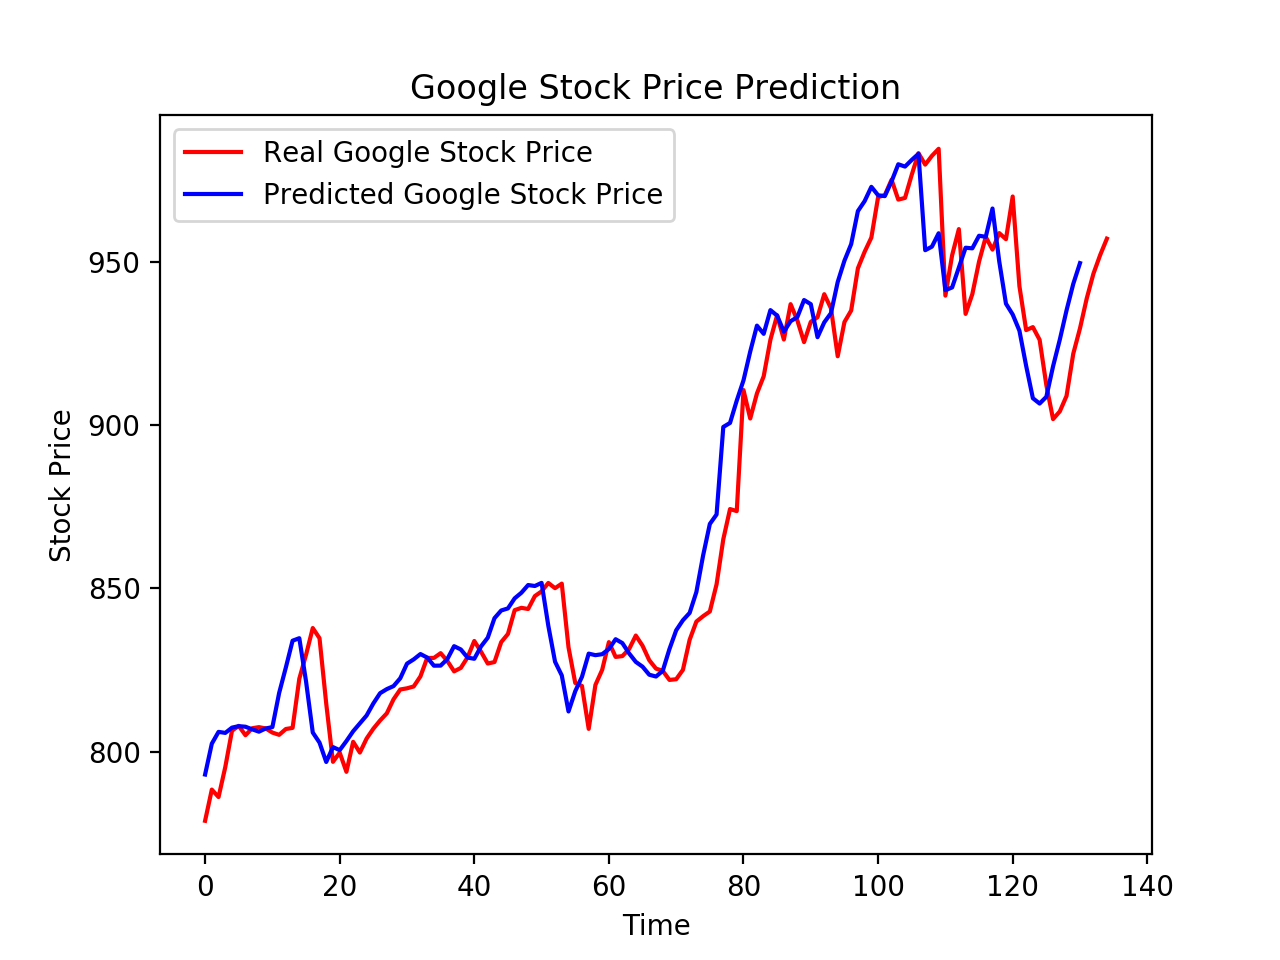

In [57]:
#Visualizing predictions

plt.figure()
plt.plot(stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
#Predicted stock from 2012 to 2016
stock_price_from_train = pd.read_csv('Google_Stock_Price_Train.csv')

stock_price_from_train = stock_price_from_train.iloc[:,1:2].values
stock_price_from_train
stock_price_from_train = sc.fit_transform(stock_price_from_train)

In [29]:
#Getting the predicted stock
predicted_stock_price_from_train = regressor.predict(X_train)

#Unscale X_train
#predicted_stock_price_from_train = sc.inverse_transform(predicted_stock_price_from_train)


<IPython.core.display.Javascript object>


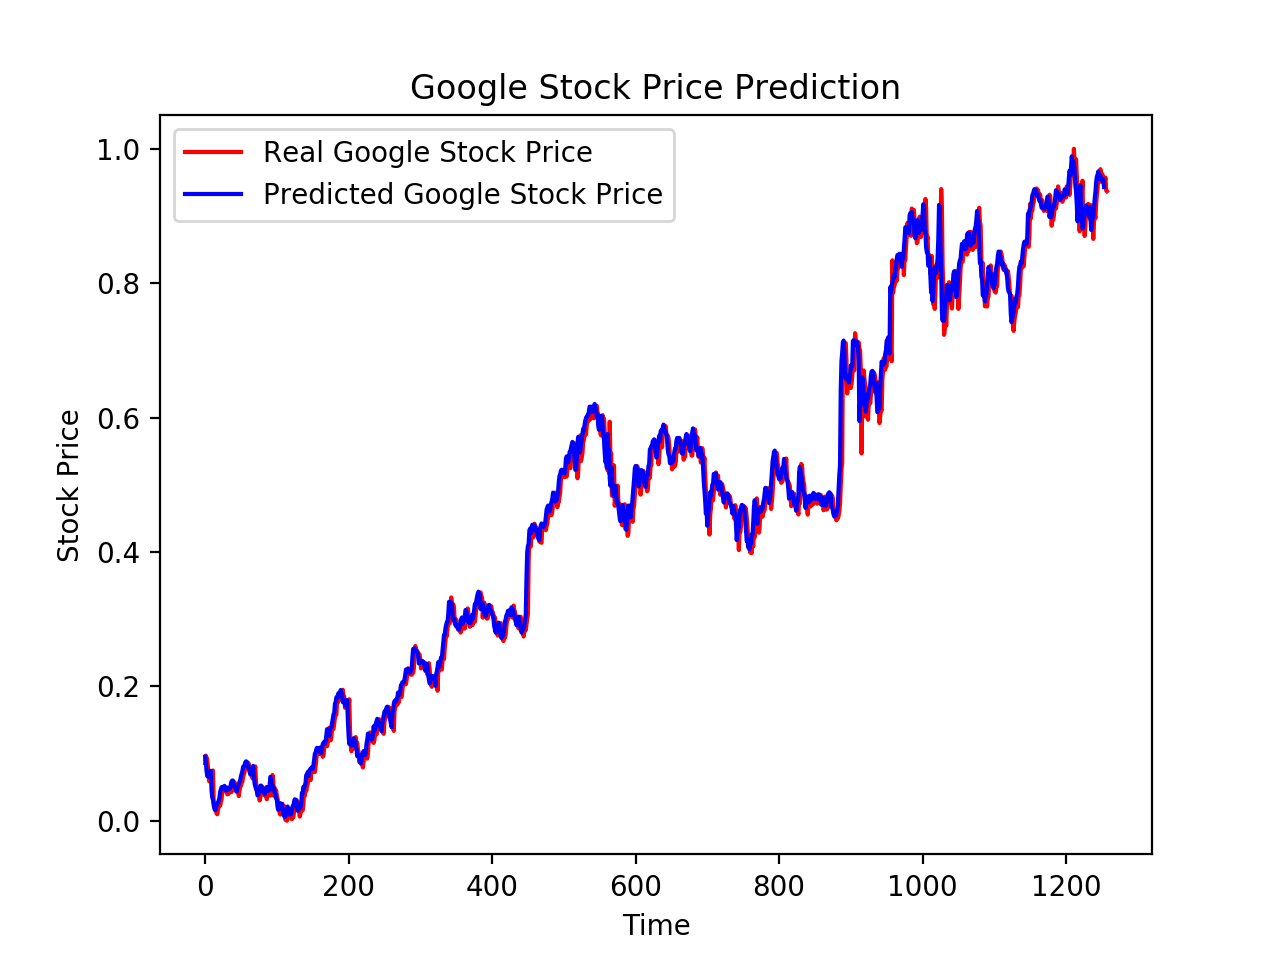

In [30]:
#Visualizing predictions
plt.figure()
plt.plot(stock_price_from_train, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_from_train, color = 'blue', label = 'Predicted Google Stock Price')

In [32]:
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()